In [29]:
# Cell 1:Import required libraries
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import joblib
from statsmodels.stats.contingency_tables import mcnemar

In [21]:
# Cell 2: Load preprocessed data
df = pd.read_csv(r"C:\Users\nimak\Documents\Projects\bank-marketing-classification\data\bank_marketing_processed.csv")

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (32950, 63), Test shape: (8238, 63)


In [22]:
# Cell 3: Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM (Linear Kernel)': SVC(kernel='linear', probability=True)
}

# Add additional tree-based models
models.update({
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42)
})


🧠 Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.44      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238



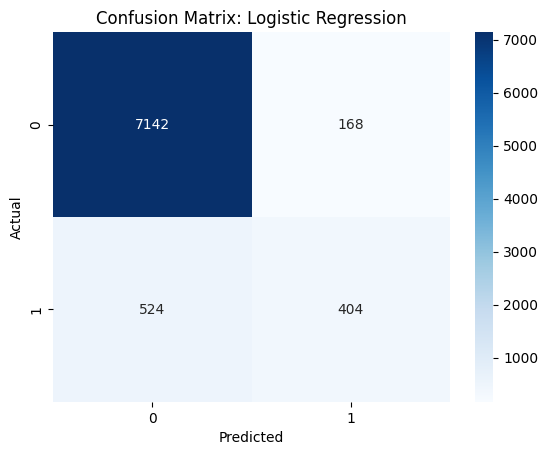


🧠 Linear Discriminant Analysis Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7310
           1       0.66      0.52      0.58       928

    accuracy                           0.92      8238
   macro avg       0.80      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238



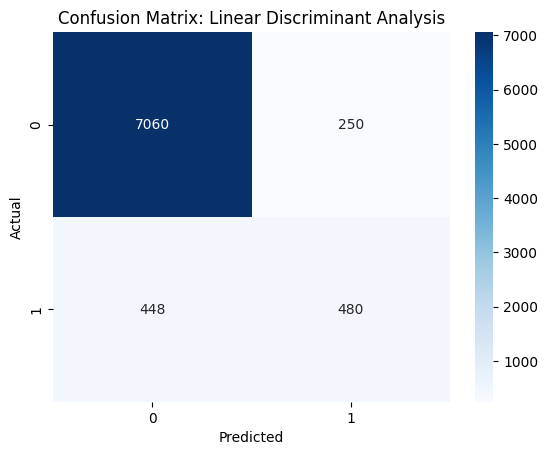


🧠 k-Nearest Neighbors Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.63      0.45      0.52       928

    accuracy                           0.91      8238
   macro avg       0.78      0.71      0.73      8238
weighted avg       0.90      0.91      0.90      8238



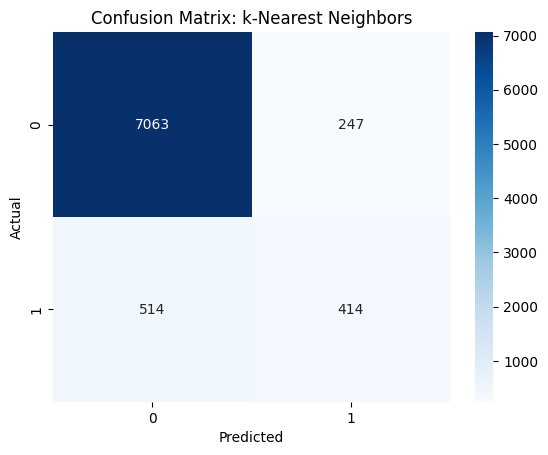


🧠 Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      7310
           1       0.35      0.69      0.46       928

    accuracy                           0.82      8238
   macro avg       0.65      0.76      0.68      8238
weighted avg       0.89      0.82      0.84      8238



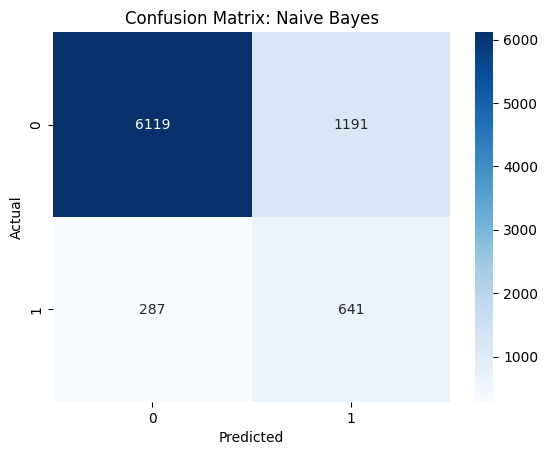


🧠 SVM (Linear Kernel) Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.67      0.32      0.43       928

    accuracy                           0.91      8238
   macro avg       0.80      0.65      0.69      8238
weighted avg       0.89      0.91      0.89      8238



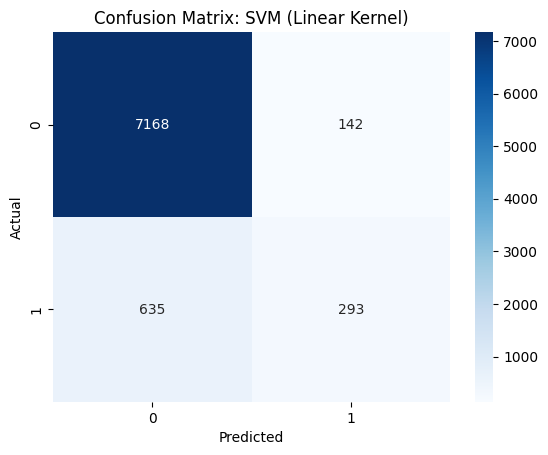


🧠 Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.53      0.52      0.53       928

    accuracy                           0.89      8238
   macro avg       0.74      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



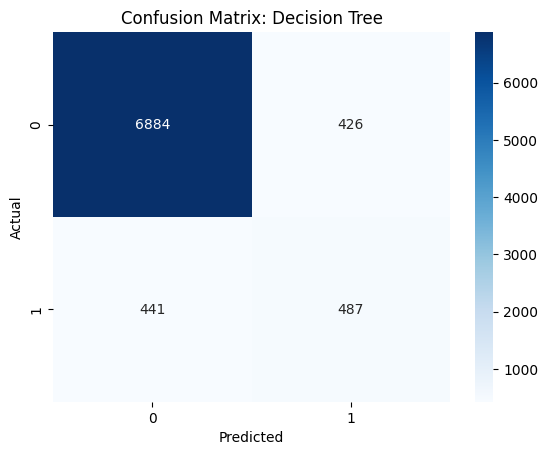


🧠 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.70      0.48      0.57       928

    accuracy                           0.92      8238
   macro avg       0.82      0.73      0.76      8238
weighted avg       0.91      0.92      0.91      8238



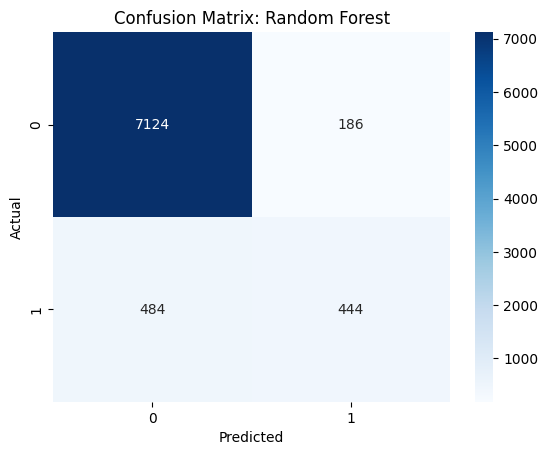


🧠 Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.70      0.54      0.61       928

    accuracy                           0.92      8238
   macro avg       0.82      0.76      0.78      8238
weighted avg       0.92      0.92      0.92      8238



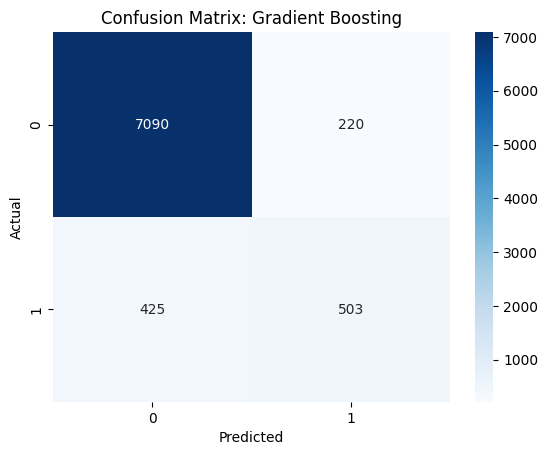


🧠 Extra Trees Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.67      0.38      0.48       928

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



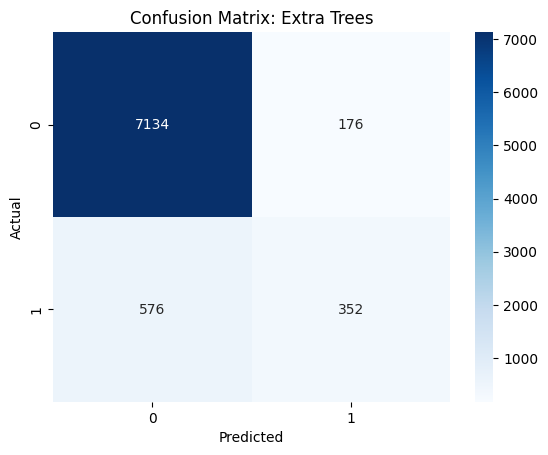

In [23]:
# Cell 4: Train and evaluate models
predictions = {}
metrics = []
best_model = None
best_f1 = 0.0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics.append([name, acc, prec, rec, f1])

    print(f"\n🧠 {name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    if name == 'Gradient Boosting':
        best_model = model


In [25]:
# Create comparison table
comparison_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
comparison_df.sort_values(by='F1-Score', ascending=False, inplace=True)

print("\n📊 Comparison of All Classifiers:")
display(comparison_df)


📊 Comparison of All Classifiers:


,Model,Accuracy,Precision,Recall,F1-Score
7,Gradient Boosting,0.921704,0.695712,0.542026,0.609328
1,Linear Discriminant Analysis,0.915271,0.657534,0.517241,0.579011
6,Random Forest,0.918670,0.704762,0.478448,0.569961
0,Logistic Regression,0.915999,0.706294,0.435345,0.538667
5,Decision Tree,0.894756,0.533406,0.524784,0.529060
2,k-Nearest Neighbors,0.907623,0.626324,0.446121,0.521082
8,Extra Trees,0.908716,0.666667,0.379310,0.483516
3,Naive Bayes,0.820588,0.349891,0.690733,0.464493
4,SVM (Linear Kernel),0.905681,0.673563,0.315733,0.429934


In [30]:
#Cell 6: 🔬 McNemar’s Test (With p-values)
'''Compares all classifier pairs to determine if their performance is statistically significantly different. 
Low p-values (p < 0.05) indicate significant difference.'''

model_names = list(predictions.keys())
mcnemar_pvals = pd.DataFrame(index=model_names, columns=model_names)

def compute_mcnemar(y_true, pred1, pred2):
    # Contingency table counts
    both_correct = np.sum((pred1 == y_true) & (pred2 == y_true))
    model1_correct_only = np.sum((pred1 == y_true) & (pred2 != y_true))
    model2_correct_only = np.sum((pred1 != y_true) & (pred2 == y_true))
    both_wrong = np.sum((pred1 != y_true) & (pred2 != y_true))
    
    table = [[both_correct, model1_correct_only],
             [model2_correct_only, both_wrong]]
    
    result = mcnemar(table, exact=False, correction=True)
    return result.pvalue

for i in model_names:
    for j in model_names:
        if i == j:
            mcnemar_pvals.loc[i,j] = np.nan
        else:
            pval = compute_mcnemar(y_test.values, predictions[i], predictions[j])
            mcnemar_pvals.loc[i,j] = round(pval, 4)

print("\nPairwise McNemar’s test p-values:")
display(mcnemar_pvals)


Pairwise McNemar’s test p-values:


,Logistic Regression,Linear Discriminant Analysis,k-Nearest Neighbors,Naive Bayes,SVM (Linear Kernel),Decision Tree,Random Forest,Gradient Boosting,Extra Trees
Logistic Regression,NaN,0.7168,0.0015,0.0,0.0,0.0,0.2937,0.005,0.0066
Linear Discriminant Analysis,0.7168,NaN,0.0045,0.0,0.0,0.0,0.1991,0.0025,0.0208
k-Nearest Neighbors,0.0015,0.0045,NaN,0.0,0.4899,0.0001,0.0,0.0,0.7064
Naive Bayes,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
SVM (Linear Kernel),0.0,0.0,0.4899,0.0,NaN,0.0017,0.0,0.0,0.2563
Decision Tree,0.0,0.0,0.0001,0.0,0.0017,NaN,0.0,0.0,0.0
Random Forest,0.2937,0.1991,0.0,0.0,0.0,0.0,NaN,0.2078,0.0
Gradient Boosting,0.005,0.0025,0.0,0.0,0.0,0.0,0.2078,NaN,0.0
Extra Trees,0.0066,0.0208,0.7064,0.0,0.2563,0.0,0.0,0.0,NaN


In [27]:
### 🧮 Traditional McNemar’s Test (Manual Chi-Square)
'''Manual implementation using:
χ² = ((|e01 - e10| - 1)²) / (e01 + e10)  
Threshold for significance: χ² > 3.84 (α = 0.05)'''

model_names = list(predictions.keys())
mcnemar_stat = pd.DataFrame(index=model_names, columns=model_names)

def traditional_mcnemar_stat(y_true, pred1, pred2):
    # e01: model1 is correct, model2 is wrong
    e01 = np.sum((pred1 == y_true) & (pred2 != y_true))
    # e10: model1 is wrong, model2 is correct
    e10 = np.sum((pred1 != y_true) & (pred2 == y_true))

    if e01 + e10 == 0:
        return "N/A"  # Avoid divide by zero
    chi2 = ((abs(e01 - e10) - 1) ** 2) / (e01 + e10)
    return round(chi2, 4)

# Fill the table with McNemar chi2 stats
for i in model_names:
    for j in model_names:
        if i == j:
            mcnemar_stat.loc[i, j] = np.nan
        else:
            stat = traditional_mcnemar_stat(y_test.values, predictions[i], predictions[j])
            mcnemar_stat.loc[i, j] = stat

print("🧪 McNemar Test Statistic (Chi-Square):")
display(mcnemar_stat)


🧪 McNemar Test Statistic (Chi-Square):


,Logistic Regression,Linear Discriminant Analysis,k-Nearest Neighbors,Naive Bayes,SVM (Linear Kernel),Decision Tree,Random Forest,Gradient Boosting,Extra Trees
Logistic Regression,NaN,0.1316,10.0741,439.5328,27.4553,40.6389,1.1025,7.8662,7.375
Linear Discriminant Analysis,0.1316,NaN,8.0587,459.728,19.1924,37.1858,1.6493,9.1044,5.3403
k-Nearest Neighbors,10.0741,8.0587,NaN,359.7586,0.4767,14.4685,18.2844,26.5562,0.1419
Naive Bayes,439.5328,459.728,359.7586,NaN,340.9882,239.9097,461.2245,504.9044,369.6378
SVM (Linear Kernel),27.4553,19.1924,0.4767,340.9882,NaN,9.8275,23.167,37.145,1.2886
Decision Tree,40.6389,37.1858,14.4685,239.9097,9.8275,NaN,53.5788,67.0893,16.6402
Random Forest,1.1025,1.6493,18.2844,461.2245,23.167,53.5788,NaN,1.5868,20.8949
Gradient Boosting,7.8662,9.1044,26.5562,504.9044,37.145,67.0893,1.5868,NaN,21.0019
Extra Trees,7.375,5.3403,0.1419,369.6378,1.2886,16.6402,20.8949,21.0019,NaN


In [31]:
# Save predictions dictionary and best model
joblib.dump(predictions, 'model_predictions.pkl')
joblib.dump(best_model, 'best_model_gradient_boosting.pkl')

['best_model_gradient_boosting.pkl']